In [8]:
import ipywidgets as widgets
import PIL

In [41]:
# Cat vs not cat

In [1]:
from fastai.vision.all import *
path = untar_data(URLs.PETS)/'images'

In [3]:
def is_cat(x):
    return x[0].isupper()

dls = ImageDataLoaders.from_name_func(path, get_image_files(path), valid_pct = 0.2, seed=42, label_func=is_cat, item_tfms=Resize(224))

In [4]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.162398,0.019645,0.004736,12:51


epoch,train_loss,valid_loss,error_rate,time
0,0.048333,0.023930,0.006766,17:17


In [24]:
img = PILImage.create(r"download.jfif")
is_cat, _, probs = learn.predict(img) 
print(f"is this a cat? : {is_cat}")
print(f"probability: {probs}")

is this a cat? : True
probability: tensor([7.1067e-17, 1.0000e+00])


In [42]:
# Image segmentation

In [28]:
import numpy as np

In [29]:
path = untar_data(URLs.CAMVID_TINY)

dls = SegmentationDataLoaders.from_label_func(path, bs=8, fnames=get_image_files(path/'images'), 
                                             label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
                                             codes = np.loadtxt(path/'codes.txt', dtype=str))

In [30]:
learn = unet_learner(dls, resnet34)
learn.fine_tune(8)

epoch,train_loss,valid_loss,time
0,3.046549,2.842731,00:17


epoch,train_loss,valid_loss,time
0,2.106440,1.621450,00:20
1,1.674283,1.263609,00:20
2,1.471200,1.683536,00:19
3,1.370953,1.079095,00:19
4,1.239797,0.980067,00:19
5,1.120061,0.863933,00:21
6,1.017224,0.805935,00:20
7,0.935424,0.804646,00:21


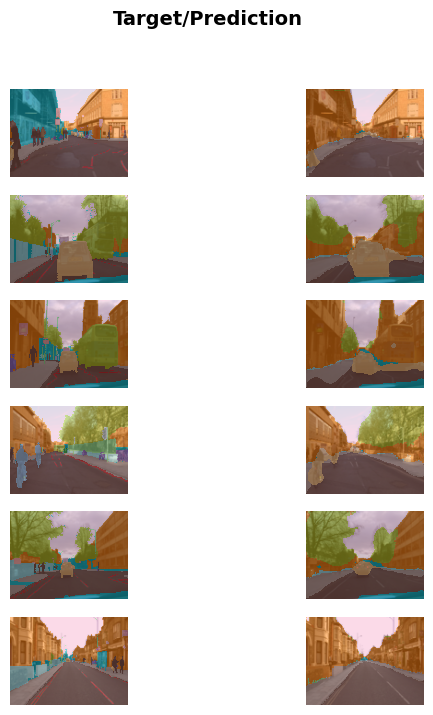

In [31]:
learn.show_results(max_n=6, figsize=(7,8))

In [43]:
# Predict IMDB rating

In [32]:
from fastai.text.all import *

In [ ]:
dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid='test')
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)
learn.fine_tune(4, 1e-2)

In [ ]:
learn.predict("I really liked the movie.")

In [44]:
# tabular predictions

In [34]:
from fastai.tabular.all import *
path = untar_data(URLs.ADULT_SAMPLE)

In [38]:
dls = TabularDataLoaders.from_csv(path/'adult.csv', path=path, y_names='salary',
                                 cat_names = ['workclass', 'education', 'marital-status', 'occupation', 'relationship','race'],
                                 cont_names = ['age','fnlwgt','education-num'],
                                 procs = [Categorify, FillMissing, Normalize])
learn = tabular_learner(dls, metrics = accuracy)
learn.fit_one_cycle(3)

C:\Users\ManjunathSirur\anaconda3\envs\fastai\Lib\site-packages\fastai\tabular\core.py:312: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  to[n].fillna(self.na_dict[n], inplace=True)


epoch,train_loss,valid_loss,accuracy,time
0,0.380916,0.371675,0.818335,00:03
1,0.362295,0.349683,0.835227,00:03
2,0.356555,0.347297,0.837070,00:03


In [35]:
print(path)

C:\Users\ManjunathSirur\.fastai\data\adult_sample


In [39]:
# df=pd.read_csv(r"C:\Users\ManjunathSirur\.fastai\data\adult_sample\adult.csv")
# df

In [45]:
# recommendation system

In [40]:
from fastai.collab import *
path = untar_data(URLs.ML_SAMPLE)
dls = CollabDataLoaders.from_csv(path/'ratings.csv')
learn = collab_learner(dls, y_range=(0.5, 5.5))
learn.fine_tune(10)

epoch,train_loss,valid_loss,time
0,1.509463,1.415722,00:00


epoch,train_loss,valid_loss,time
0,1.345152,1.358717,00:00
1,1.257437,1.197945,00:00
2,1.051716,0.908661,00:00
3,0.814703,0.730751,00:00
4,0.670440,0.673535,00:00
5,0.640801,0.658196,00:00
6,0.603407,0.651451,00:00
7,0.600844,0.647099,00:00
8,0.578635,0.646195,00:00
9,0.572629,0.646011,00:00
